In [1]:
import pickle
import pandas as pd
pd.set_option('display.max_rows', 150)

# validation set

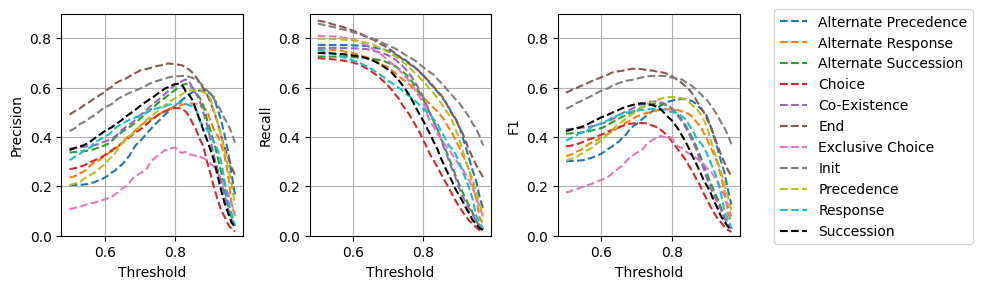

In [2]:
# on exact rules
import matplotlib.pyplot as plt 
import pandas as pd
colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','black']
d = pd.read_pickle('evaluation_sap_sam_2022_validation_label2constraint_seperated_new.pkl')
d = d[['constraint_type', 'threshold', 'precision', 'recall','f1']].groupby(['threshold','constraint_type']).mean().reset_index()
f, ax = plt.subplots(ncols=3,figsize=(10, 3))
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[0].plot(d_temp.threshold, d_temp.precision, color=colors[index], label=constraint, linestyle='--')
ax[0].grid()
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Precision')
ax[0].set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[1].plot(d_temp.threshold, d_temp.recall, color=colors[index], label=constraint, linestyle='--')
ax[1].grid()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Recall')
ax[1].set_ylim(0,0.9)
for index, constraint in enumerate(sorted(d.constraint_type.unique())):
    d_temp=d[d['constraint_type']==constraint]
    ax[2].plot(d_temp.threshold, d_temp.f1, color=colors[index], label=constraint, linestyle='--')
ax[2].grid()
ax[2].set_xlabel('Threshold')
ax[2].set_ylabel('F1')
ax[2].set_ylim(0,0.9)
ax[2].legend(bbox_to_anchor=(1.15, 1.05))
f.tight_layout()
plt.show()

get the best threshold

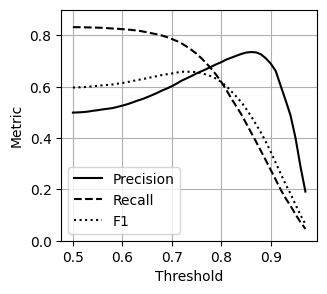

In [10]:
#FOR COMPARISON WITH BERT AND SVM (on follow relations) on VALIDATION SET 
import matplotlib.pyplot as plt 
import pandas as pd
d = pd.read_pickle('evaluation_sap_sam_2022_validation_label2constraint_for_comparison_set_new.pkl')
d.threshold = d.threshold.apply(lambda x: round(x,2))
d = d[['threshold', 'precision', 'recall','f1']].groupby(['threshold']).mean().reset_index()
f, ax = plt.subplots(1, 1,figsize=(3.3, 3))
ax.plot(d.threshold, d.precision, color='black', label="Precision", linestyle="-")
ax.plot(d.threshold, d.recall, color='black', label="Recall", linestyle="--")
ax.plot(d.threshold, d.f1, color='black', label="F1", linestyle='dotted')
ax.grid()
ax.set_xlabel('Threshold')
ax.set_ylim(0,0.9)
ax.set_ylabel('Metric')
ax.legend(loc='lower left')
plt.show()
#f.savefig('evaluation_sap_sam_2022_validation_label2constraint_for_comparison_set_new.pdf',bbox_inches='tight')

In [13]:
opt_th = d.iloc[d['f1'].idxmax()]['threshold']
opt_th

0.73